In [ ]:
! poetry install

Installing dependencies from lock file

No dependencies to install or update

Installing the current project: dialog2graph (0.1.0)


# Create dialog2graph.Graph

[Graph](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/index.html#dialog2graph.Graph) is a base class in dialog2graph package that enables to create a directed dialog graph and work with it. You can visualise it and sample dialogs from it. 

In [ ]:
from dialog2graph import Graph

For experimenting with dialog graphs a set with generated data was created. It can be loaded from [HuggingFace](https://huggingface.co/datasets/DeepPavlov/d2g_generated) and contains 402 dialog graphs on various topics concerning custom support and other topics.

In [3]:
from datasets import load_dataset

dataset = load_dataset("DeepPavlov/d2g_generated", token=True)

First, initialize [Graph](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/index.html#dialog2graph.Graph) by passing a dictionary with graph edges and nodes (`{"edges": [...], "nodes": [...]}`).

In [4]:
some_graph_dict = dataset["train"][5]["graph"]
print("Graph keys:", some_graph_dict.keys())
print("Graph edges:", some_graph_dict["edges"][:3])
print("Graph nodes:", some_graph_dict["nodes"][:3])

Graph keys: dict_keys(['edges', 'nodes'])
Graph edges: [{'source': 1, 'target': 2, 'utterances': ["Hi, I'd like to recycle some items."]}, {'source': 1, 'target': 3, 'utterances': ['Hello, how does the recycling program work?']}, {'source': 1, 'target': 7, 'utterances': ["I'd like to stop."]}]
Graph nodes: [{'id': 1, 'is_start': True, 'label': 'greeting', 'utterances': ['Hello! Welcome to our recycling program. How can I assist you today?']}, {'id': 2, 'is_start': False, 'label': 'recycle_items', 'utterances': ['Great! What type of items would you like to recycle? We accept electronics, plastics, and paper.']}, {'id': 3, 'is_start': False, 'label': 'explain_program', 'utterances': ['Our recycling program allows you to return electronics, plastics, and paper either by visiting a recycling center or scheduling a pickup. How would you like to proceed?']}]


In [5]:
graph = Graph(graph_dict=some_graph_dict)

Then you can visualise the graph with all the utterances it contains.

Install pygraphviz from http://pygraphviz.github.io/ .
Falling back to default layout.


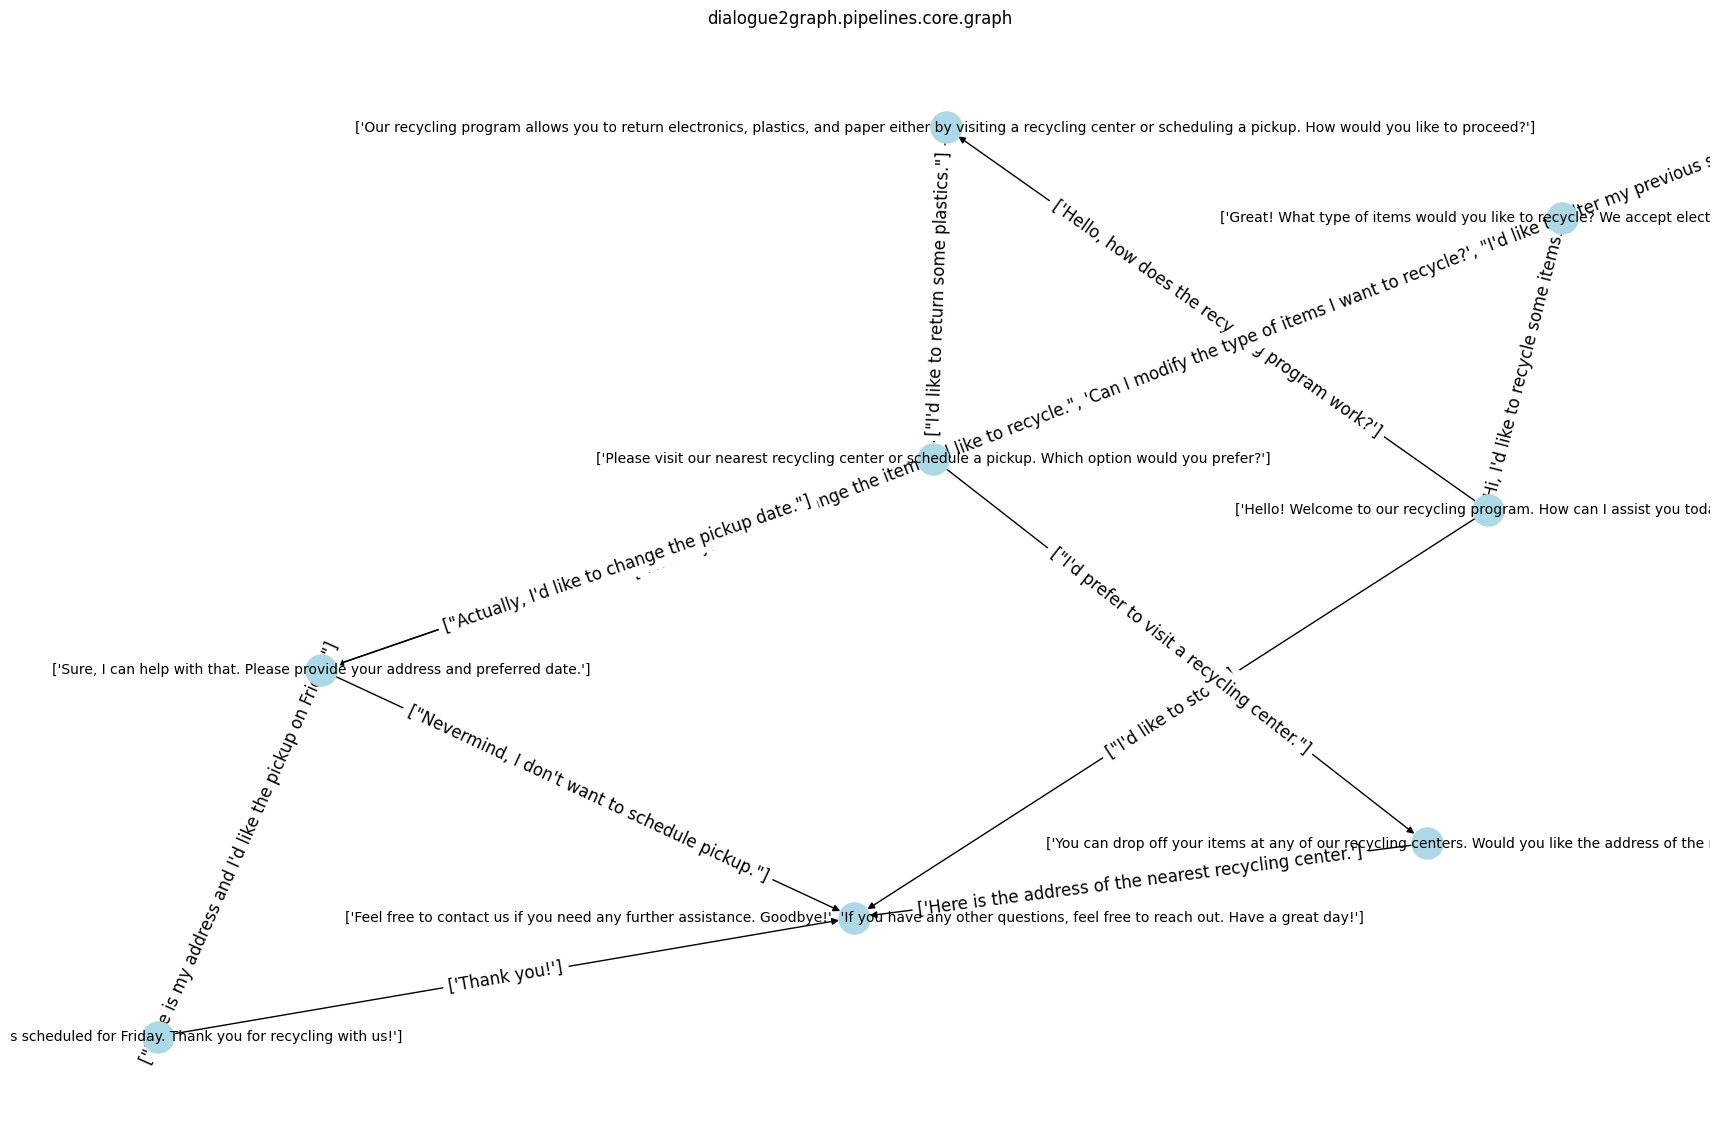

In [6]:
graph.visualise()

Or you can visualise the graph in a more schematic way to see its general structure.

Install pygraphviz from http://pygraphviz.github.io/ .
Falling back to default layout.


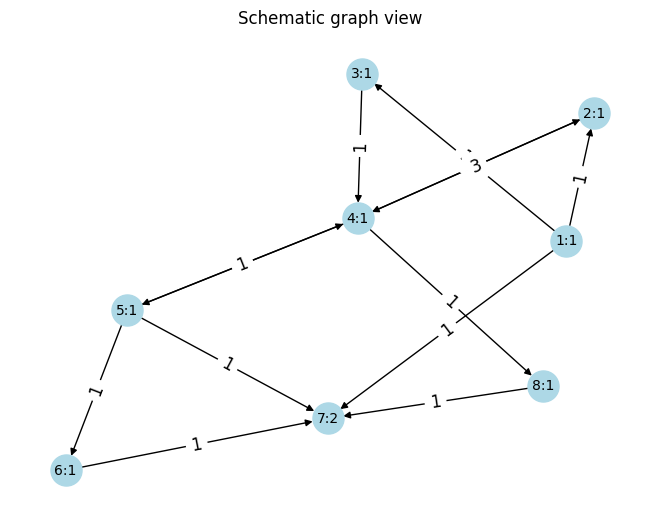

In [7]:
graph_title = "Schematic graph view"
graph.visualise_short(graph_title)

# Create dialog2graph.RecursiveDialogSampler

[RecursiveDialogSampler](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/pipelines/core/index.html#dialog2graph.pipelines.core.RecursiveDialogSampler) is a class that helps to sample dialogs from existing dialog graphs. It uses recursion to get all possible dialogs from the graph.

In [8]:
from dialog2graph.pipelines.core.dialog_sampling import RecursiveDialogSampler
from langchain_openai import ChatOpenAI

To sample dialogs from the graph, create [RecursiveDialogSampler](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/pipelines/core/index.html#dialog2graph.pipelines.core.RecursiveDialogSampler) instance and use invoke method to start sampling process.

In [9]:
sampler = RecursiveDialogSampler()
model = ChatOpenAI(model="gpt-3.5-turbo")
dialogs: list = sampler.invoke(graph=graph, upper_limit=10, cycle_ends_model=model)

INFO:dialog2graph.metrics.no_llm_metrics.metrics:Graph has all the dialogs


The output of [invoke](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/pipelines/core/index.html#dialog2graph.pipelines.core.RecursiveDialogSampler.invoke) method is a list of [Dialog](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/index.html#dialog2graph.Dialog) instances. This class is also helpful when working with dialog graphs.

In [10]:
type(dialogs[0])

dialog2graph.pipelines.core.dialog.Dialog

# Use dialog2graph.Dialog

[Dialog](https://deeppavlov.github.io/dialog2graph/dev/autoapi/dialog2graph/index.html#dialog2graph.Dialog) is a class that represents a complete dialog and provide method for visualisation and converting.

In [11]:
print(dialogs[0])

assistant: Hello! Welcome to our recycling program. How can I assist you today?
user: Hello, how does the recycling program work?
assistant: Our recycling program allows you to return electronics, plastics, and paper either by visiting a recycling center or scheduling a pickup. How would you like to proceed?
user: I'd like to return some plastics.
assistant: Please visit our nearest recycling center or schedule a pickup. Which option would you prefer?
user: Actually, I want to change the items I'd like to recycle.
assistant: Great! What type of items would you like to recycle? We accept electronics, plastics, and paper.
user: I'd like to recycle electronics.
assistant: Please visit our nearest recycling center or schedule a pickup. Which option would you prefer?
user: I'd like to schedule a pickup.
assistant: Sure, I can help with that. Please provide your address and preferred date.
user: Actually, I'd like to change the pickup date.
assistant: Please visit our nearest recycling cente

In [12]:
dialogs[0].to_list()

[{'text': 'Hello! Welcome to our recycling program. How can I assist you today?',
  'participant': 'assistant'},
 {'text': 'Hello, how does the recycling program work?',
  'participant': 'user'},
 {'text': 'Our recycling program allows you to return electronics, plastics, and paper either by visiting a recycling center or scheduling a pickup. How would you like to proceed?',
  'participant': 'assistant'},
 {'text': "I'd like to return some plastics.", 'participant': 'user'},
 {'text': 'Please visit our nearest recycling center or schedule a pickup. Which option would you prefer?',
  'participant': 'assistant'},
 {'text': "Actually, I want to change the items I'd like to recycle.",
  'participant': 'user'},
 {'text': 'Great! What type of items would you like to recycle? We accept electronics, plastics, and paper.',
  'participant': 'assistant'},
 {'text': "I'd like to recycle electronics.", 'participant': 'user'},
 {'text': 'Please visit our nearest recycling center or schedule a pickup